##Trabajo Práctico N°3


Importamos Spacy e instanciamos modelo

In [1]:
import spacy
nlp = spacy.load("en_core_web_sm")

Importamos otras librerías




In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Cargamos el .csv con el dataset

In [3]:
PATH = '/content/reviews.csv'
dataset = pd.read_csv(PATH)

Printeamos el dataset

In [4]:
dataset

,stars,comment,book_url
0,5.0,"Let me say at the outset of this review, that ...",https://www.amazon.com/dp/1492041130
1,1.0,Its Capitalism at its best. I read the book fr...,https://www.amazon.com/dp/1492041130
2,5.0,If you're looking to get started with data sci...,https://www.amazon.com/dp/1492041130
3,4.0,"In general, this is a good book. It covers a w...",https://www.amazon.com/dp/1492041130
4,5.0,I was an academic data scientist decades befor...,https://www.amazon.com/dp/1492041130
...,...,...,...
20642,3.0,This book offers nice information and thoughts...,https://www.amazon.com/dp/0980200482
20643,5.0,"Am disabled, retired RN, but always wished I w...",https://www.amazon.com/dp/0980200482
20644,3.0,At one point I considered library work as oppo...,https://www.amazon.com/dp/0980200482
20645,5.0,"Overall, I think this is an excellent resource...",https://www.amazon.com/dp/0980200482


In [5]:
dataset.shape

(20647, 3)

###Función para eliminar stop word, signos de puntuación, convertir lemmas y convertir a minúsculas

In [6]:
def clean_text(text):
  clean_text = []
  for token in nlp(text):
    if not token.is_stop and not token.is_punct:
      clean_text.append(token.lemma_.lower())

  return " ".join(clean_text)

In [7]:
df = dataset.copy()

In [8]:
%%time
df["comment"] = df["comment"].apply(clean_text)

CPU times: user 7min 20s, sys: 1.9 s, total: 7min 22s
Wall time: 7min 25s


In [9]:
df.head(10)

,stars,comment,book_url
0,5.0,let outset review respect author sheer guile t...,https://www.amazon.com/dp/1492041130
1,1.0,capitalism good read book nearby bookstore lik...,https://www.amazon.com/dp/1492041130
2,5.0,look start datum science confused material use...,https://www.amazon.com/dp/1492041130
3,4.0,general good book cover wide variety topic go ...,https://www.amazon.com/dp/1492041130
4,5.0,academic datum scientist decade term coin love...,https://www.amazon.com/dp/1492041130
5,4.0,book nice approach cover basic statistic encou...,https://www.amazon.com/dp/1492041130
6,5.0,important data science book read pick alongs...,https://www.amazon.com/dp/1492041130
7,5.0,book suitable people basic python programming ...,https://www.amazon.com/dp/1492041130
8,2.0,specifically probability notation mess varie p...,https://www.amazon.com/dp/1492041130
9,5.0,book data science great fundamental book surve...,https://www.amazon.com/dp/1492041130


Regex para limpiar los digitos y algunos signos en el dataset

In [10]:
import re

In [11]:
pat_num = "\d+"
pat_num_regex = re.compile(pat_num)
reemplazo = ""

In [12]:
pat_signo = "\s\W+"
pat_signo_regex = re.compile(pat_signo)

In [13]:
pat_punt = "[^\w\s]"
pat_punt_regex = re.compile(pat_punt)

In [14]:
df_clean = df.copy()
df_clean

,stars,comment,book_url
0,5.0,let outset review respect author sheer guile t...,https://www.amazon.com/dp/1492041130
1,1.0,capitalism good read book nearby bookstore lik...,https://www.amazon.com/dp/1492041130
2,5.0,look start datum science confused material use...,https://www.amazon.com/dp/1492041130
3,4.0,general good book cover wide variety topic go ...,https://www.amazon.com/dp/1492041130
4,5.0,academic datum scientist decade term coin love...,https://www.amazon.com/dp/1492041130
...,...,...,...
20642,3.0,book offer nice information thought think libr...,https://www.amazon.com/dp/0980200482
20643,5.0,disabled retired rn wish librarian!:- encour...,https://www.amazon.com/dp/0980200482
20644,3.0,point consider library work oppose work litera...,https://www.amazon.com/dp/0980200482
20645,5.0,overall think excellent resource pursue career...,https://www.amazon.com/dp/0980200482


In [15]:
df_clean["comment"] = df_clean["comment"].apply(lambda x: pat_num_regex.sub(reemplazo, x))
df_clean["comment"] = df_clean["comment"].apply(lambda x: pat_signo_regex.sub(reemplazo, x))
df_clean["comment"] = df_clean["comment"].apply(lambda x: pat_punt_regex.sub(reemplazo, x))
df_clean['comment']

0        let outset review respect author sheer guile t...
1        capitalism good read book nearby bookstore lik...
2        look start datum science confused material use...
3        general good book cover wide variety topic go ...
4        academic datum scientist decade term coin love...
                               ...                        
20642    book offer nice information thought think libr...
20643    disabled retired rn wish librarianencourage gr...
20644    point consider library work oppose work litera...
20645    overall think excellent resource pursue career...
20646                                                great
Name: comment, Length: 20647, dtype: object

Exportar el dataframe limpio como csv

In [ ]:
df_clean.to_csv("reviews_cleaned.csv", index= False)

### TFIDF

Generar X_train, X_test, y_train e y_test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df_clean.comment.copy()
y = df_clean.stars.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Importar tfidf vectorizer y aplicarlo sobre X_train y X_test

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [20]:
X_train

<14452x42128 sparse matrix of type '<class 'numpy.float64'>'
	with 457572 stored elements in Compressed Sparse Row format>

In [21]:
X_test

<6195x42128 sparse matrix of type '<class 'numpy.float64'>'
	with 185301 stored elements in Compressed Sparse Row format>

In [22]:
vectorizer.get_feature_names_out()

array(['_mongo_jsonpy', 'aa', 'aaa', ..., 'три', 'уоu', 'хорошо'],
      dtype=object)

Entrenar un RF con los datos ya vectorizados.

Utilizar:
- random_state=0


In [23]:
%%time
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

CPU times: user 1min 5s, sys: 158 ms, total: 1min 5s
Wall time: 1min 5s


RandomForestClassifier(random_state=0)

In [ ]:
"""
%%time
from sklearn.svm import SVC
clf = SVC(random_state=0, C=0.7)
clf.fit(X_train, y_train)
"""

Imprimir el classification report

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_train, clf.predict(X_train)))
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1019
         2.0       1.00      0.99      0.99       665
         3.0       1.00      0.99      1.00       985
         4.0       1.00      0.97      0.98      2002
         5.0       0.99      1.00      1.00      9781

    accuracy                           0.99     14452
   macro avg       1.00      0.99      0.99     14452
weighted avg       0.99      0.99      0.99     14452

              precision    recall  f1-score   support

         1.0       0.63      0.19      0.29       411
         2.0       0.82      0.03      0.07       264
         3.0       0.72      0.05      0.09       446
         4.0       0.68      0.04      0.08       892
         5.0       0.69      0.99      0.82      4182

    accuracy                           0.69      6195
   macro avg       0.71      0.26      0.27      6195
weighted avg       0.70      0.69      0.59      6195



Matriz de confusión

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


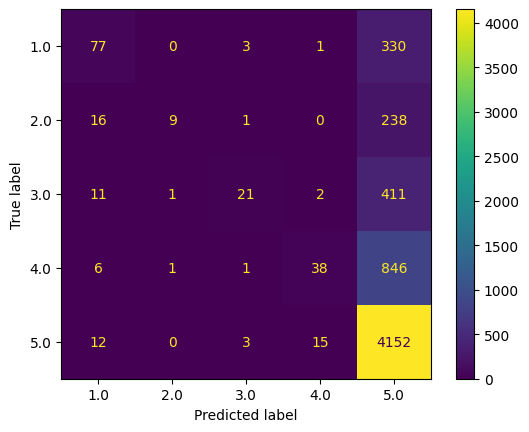

In [40]:
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()